In [1]:
from pyomo.environ import *
import matplotlib.pyplot as plt
import numpy as np
import random 

In [2]:
model = AbstractModel()
model.N =Param(mutable=True) 
model.i = RangeSet(1,model.N)
model.a = Var( bounds=(-100,100),within=Reals)
model.b = Var( bounds=(-100,100),within=Reals)
model.c = Var( bounds=(-100,100),within=Reals)

model.OF = Var(within=NonNegativeReals, initialize=5)
def initval(model,i):
    return 0.5+0.1*random.gauss(0,1)
model.Xloc=Param(model.i,  within=NonNegativeReals, initialize=initval,mutable=True)
model.Yloc=Param(model.i,  within=NonNegativeReals, initialize=initval, mutable=True)

def rule_OF(model):
    return model.OF==sum((model.a*model.Xloc[i]**2+model.b*model.Xloc[i]+model.c-model.Yloc[i])**2 for i in model.i)
model.C   = Constraint(rule=rule_OF)

model.obj1 = Objective(expr=model.OF, sense=minimize)


In [ ]:
opt = SolverFactory('Ipopt')

In [5]:
model.N=20
instance = model.create_instance()
results = opt.solve(instance) # solves and updates instance
print('OF= ',value(instance.obj1))

OF=  0.12112906057543509


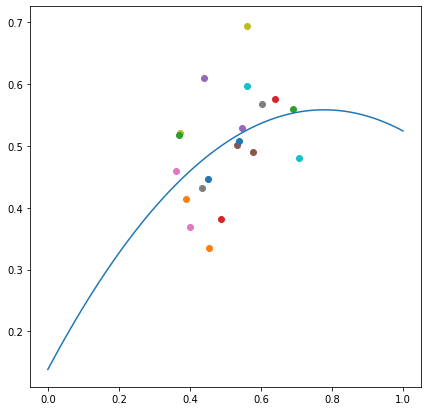

In [6]:
fig = plt.figure(figsize=(7,7))
Xc=np.linspace(0,1,100);
Yc=(value(instance.a)*Xc**2+value(instance.b)*Xc+value(instance.c))
plt.plot(Xc,Yc)
#plt.legend( ncol=3)
for i in instance.i:
    plt.scatter(value(instance.Xloc[i]),value(instance.Yloc[i]),label=str(i))                